In [2]:
import importlib
import Parallel_pair_correlation_HDF5
importlib.reload(Parallel_pair_correlation_HDF5)
from Parallel_pair_correlation_HDF5 import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as Gil

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [11]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 3D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 10000

5.937210903914155


In [20]:
Parallel_correlation_function(args,step_tot,compute_steps,"20_linker_Ell_10E3.hdf",30,np.sqrt(ell_tot))

In [17]:
file = pt.open_file('20_linker_Ell_10E3.hdf','r')

In [18]:
pcfs = np.zeros((10,30,2))
n= 0.
for group in file.walk_nodes('/',classname='Group'):
    n+=1
    for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
        pcfs[i] += array.read()
pcfs /= n
#array = file.get_node('/bin_hist_0x10c66/')

(0.0, 10.0)

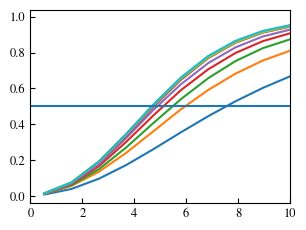

In [29]:
for xy in pcfs:
    x,y = compute_cumulative_distribution(xy[:,1]/(20*19/2),30,np.sqrt(ell_tot))
    plt.plot(x,y)
    #plt.plot(xy[:,0],xy[:,1])
plt.plot([0,30],[0.5,0.5])
plt.xlim(0,10)
#plt.yscale('log')

In [47]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

def find_intersection(x, y, X, Y):
    # Create function for the curve
    curve = interp1d(x, y, kind='cubic', fill_value='extrapolate')

    # Define function for the line
    def line(x):
        m = (Y[1] - Y[0]) / (X[1] - X[0])  # Slope of the line
        b = Y[0] - m * X[0]  # Y-intercept of the line
        return m * x + b

    # Define function for the difference between the line and the curve
    def line_minus_curve(x):
        return line(x) - curve(x)

    # Initial guess for the root finding algorithm (midpoint of the x range)
    x0 = 0

    # Find intersection point
    sol = root_scalar(line_minus_curve, bracket=[x[0], x[-1]])
    
    intersection_x = sol.root
    intersection_y = line(intersection_x)

    return intersection_x, line(intersection_x)


In [49]:
x,y = compute_cumulative_distribution(pcfs[0][:,1]/(20*19/2),30,np.sqrt(ell_tot))
print(find_intersection(x,y,[0,30],[0.25,0.25]))
x,y = compute_cumulative_distribution(pcfs[-1][:,1]/(20*19/2),30,np.sqrt(ell_tot))
print(find_intersection(x,y,[0,30],[0.25,0.25]))

(4.614721742744358, 0.25)
(3.06052709168293, 0.25)


In [37]:
curve = interp1d(x, y, kind='cubic', fill_value='extrapolate')

In [44]:
fsolve(lambda x : curve(x)-0.5, 1)

array([4.67191735])

In [4]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = ell_tot/(V)*100 # for 3D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 2* 10**6
compute_steps = 10000

5.937210903914155


In [5]:
Parallel_correlation_function(args,step_tot,compute_steps,"20_linker_Ell_10E3_high_kdiff.hdf",30,np.sqrt(ell_tot))

In [7]:
file = pt.open_file('20_linker_Ell_10E3_high_kdiff.hdf','r')

In [13]:
pcfs_high_kdiff = np.zeros((200,30,2))
n= 0.
for group in file.walk_nodes('/',classname='Group'):
    n+=1
    for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
        pcfs_high_kdiff[i] += array.read()
pcfs_high_kdiff /= n
#array = file.get_node('/bin_hist_0x10c66/')

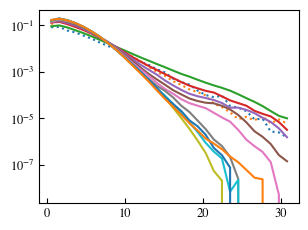

In [25]:

plt.plot(pcfs_high_kdiff[0,:,0],pcfs_high_kdiff[0,:,1],linestyle=':')
plt.plot(pcfs_high_kdiff[-1,:,0],pcfs_high_kdiff[-1,:,1],linestyle=':')

for xy in pcfs:
    plt.plot(xy[:,0],xy[:,1])

plt.yscale('log')

In [12]:
sum(1 for _ in file.list_nodes('/bin_hist_0x37b66', classname='Array'))

200

In [8]:
pcfs0 = np.zeros((10,30,2))
n= 0.
with pt.open_file('Res_from_home/20_linker_Ell_10E3.hdf','r') as file:    
    for group in file.walk_nodes('/',classname='Group'):
        n+=1
        for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
            pcfs0[i] += array.read()

pcfs1 = np.zeros((10,30,2))
n= 0.
with pt.open_file('Res_from_home/20_linker_Ell_10E3_kdiff_EllsV.hdf','r') as file:    
    for group in file.walk_nodes('/',classname='Group'):
        n+=1
        for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
            pcfs1[i] += array.read()

pcfs2 = np.zeros((10,30,2))
n= 0.
with pt.open_file('Res_from_home/20_linker_Ell_10E3_small_kdiff.hdf','r') as file:    
    for group in file.walk_nodes('/',classname='Group'):
        n+=1
        for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
            pcfs2[i] += array.read()


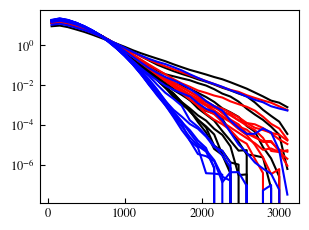

In [9]:
for xy in pcfs0:
    plt.plot(xy[:,0],xy[:,1],color='black')
for xy in pcfs1:
    plt.plot(xy[:,0],xy[:,1],color='red')
for xy in pcfs2:
    plt.plot(xy[:,0],xy[:,1],color='blue')
plt.yscale('log')

In [ ]:
file1 = 
file2 = 